<a href="https://colab.research.google.com/github/RodrigoMarquesP/Airbnb_Data_Exploration/blob/main/Analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dados vs. Insights**

<center><img width="40%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"></center>

No contexto de dados, podemos encontrar vários exemplos de aplicações no mundo real em qualquer área, mas todas elas começam no mesmo ponto:

* `Insights` testados, limpos, e não enviesados.

Isso significa que já conhecemos o potencial dos dados, sua complexidade, e sua aplicabilidade. Esse projeto visa explorar o passo anterior:

* Adquirir dados brutos, observá-los de todos os ângulos convenientes, e extrair os `insights` mais confiáveis.

Podemos fazer o download de um dataset, explorá-lo (principalmente com o módulo `Pandas`), assumir algumas hipóteses, e testá-las para validar as corretas.



## **Adquirindo os dados**

<center><img width="30%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/airbnb_logo.png"></center>

Os dados escolhidos (escolha arbitrária) são as informações de acesso livre do Airbnb sobre uma cidade escolhida, [encontrados aqui](http://insideairbnb.com/get-the-data.html), onde cada dado será uma série de características de uma propriedade registrada na plataforma.
 
Para aqueles que estão lendo este artigo próximo ao Halloween, sim, a cidade escolhida foi *Salem, no Oregon*.


<center><img width="30%" src="https://media.giphy.com/media/iDJQRjTCenF7A4BRyU/giphy.gif"></center>

Podemos utilizar o `Pandas` para baixar o dataset diretamente no nosso notebook colab:



In [2]:
# importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("http://data.insideairbnb.com/united-states/or/salem-or/2021-02-21/visualisations/listings.csv")

## <img width="5%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/cat_silhouette.png"> **Espiada**

É hora de darmos nossa primeira espiada nos dados. Para isso usamos o comando `head()` e observamos as diferentes categorias.


OBS: Por padrão, o comando mostra apenas as primeiras cinco linhas.

In [4]:
df.head()

id  ... availability_365
0  1159564  ...              365
1  2894591  ...              296
2  3454856  ...                0
3  4394073  ...              265
4  4785215  ...              364

[5 rows x 16 columns]

As variáveis são:

* `id` - número de identificação da propriedade.
* `name` - nome da propriedade.
* `host_id` - número de identificação do dono do imóvel.
* `host_name` - nome do dono do imóvel.
* `neighbourhood_group` - essa coluna contém apenas valores NaN, logo, não nos terá utilidade.
* `neighbourhood` - nome do bairro.
* `latitude` - latitude do imóvel.
* `longitude` - longitude do imóvel.
* `room_type` - tipo do quarto ofertado.
* `price` - preço do aluguel.
* `minimum_nights` - número mínimo de noites para alugar.
* `number_of_reviews` - número de avaliações do imóvel.
* `last_review` - data da última avaliação.
* `reviews_per_month` - número médio de avaliações por mês.
* `calculated_host_listings_count` - Quantidade de propriedades do dono do imóvel.
* `availability_365` - quantidade de dias do ano em que a propriedade está disponível para ser alugada.



Agora vamos avaliar a dimensão do `dataset`, que significa: 

    Quantas propriedades temos registradas?

In [5]:
print(f"Existem {df.shape[0]} propriedades, com {df.shape[1]} categorias de informações para cada.")

Existem 166 propriedades, com 16 categorias de informações para cada.


<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***Parece que temos muito poucos dados! Eles possuem relevância estatística para uso na aplicação desejada?***

Sempre temos que checar os tipos de dados, uma vez que só podemos ver, plotar, e calcular com valores numéricos. Para isso, utilizamos `dtypes`.

In [ ]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***Nesse caso, todas entidades numéricas são de tipos numéricos, portanto, não precisamos realizar nenhuma conversão antes de seu uso.***

## <img width="8%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/shovel.png"> **Cavando**

Mais fundo nos dados, podemos procurar por dados faltantes, isto é, todas linhas não estão necessariamente completas, o que pode nos causar problemas futuramente. Para isso, usaremos `isnull()`.

OBS: podemos dividir o número encontrado pelo comprimento do dataset para obter a porcentagem de valores nulos.




In [ ]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.210843
last_review                       0.210843
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***A coluna `neighbourhood_group` é completamente inútil.***

<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***Uma quinta parte da informação das avaliações está faltando. Precisamos ser cuidadosos usando o restante:***

* ***Existem dados remanescentes suficientes para que representem algo?***
* ***Sua relação com outras variáveis ainda é confiável?***

Os atributos numéricos sempre possuem uma distribuição (às vezes muito bem conhecida). Investigar a distribuição nos permite perceber outliers, tendências, enviesamento, etc.
 
O módulo `Pandas` tem um método rápido para plotar histogramas das colunas numéricas do dataframe: `hist(bins=b)`


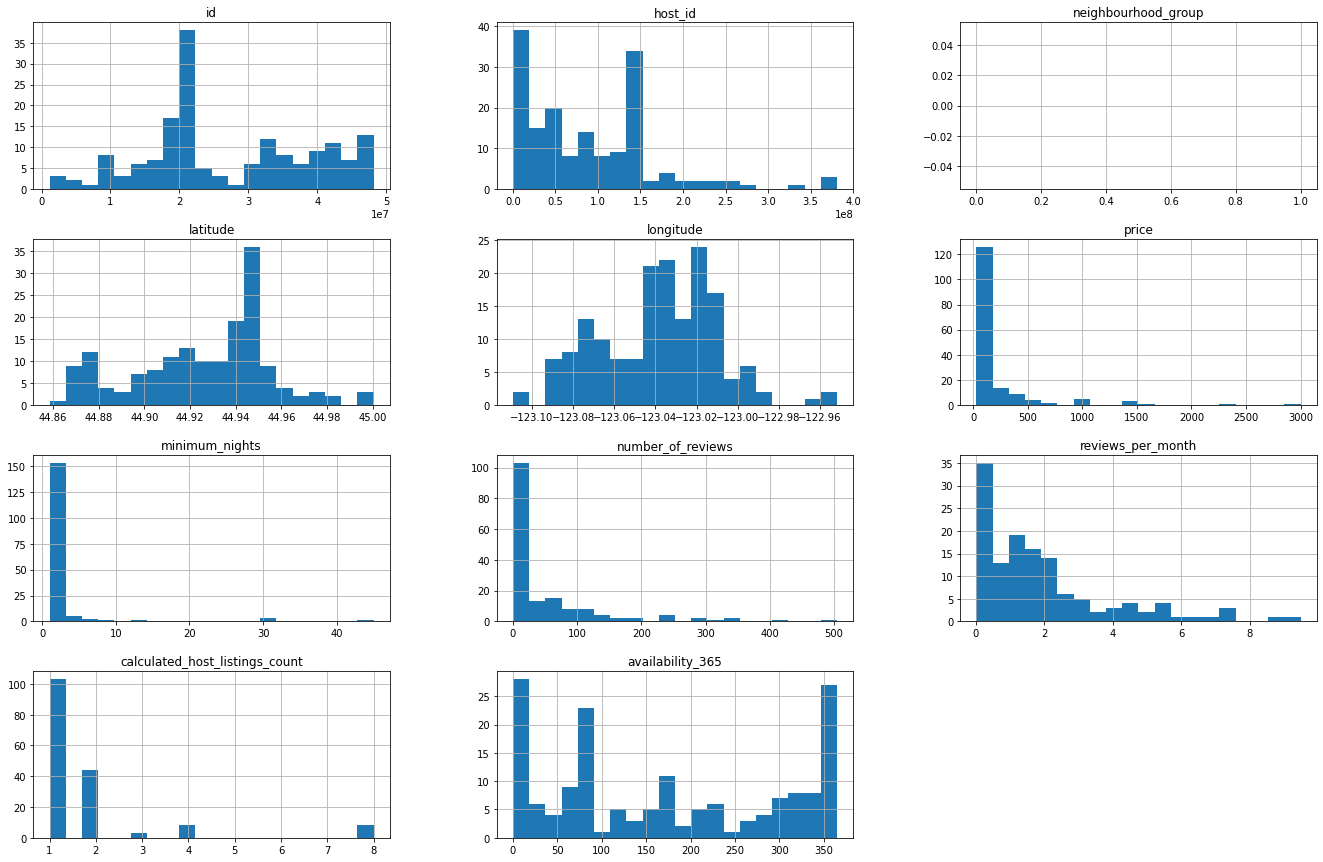

In [ ]:
df.hist(bins=20, figsize=(23, 15));

<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***As distribuições de `id`, `host_id`, `neighbourhood_group`, e `calculated_host_listings_count` não têm significado, então não precisamos nos preocupar com sua forma.***

<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***Os gráficos de `latitude` e `longitude` aparentam estar próximos de uma distribuição normal com média no centro, o que reflete a característica central das cidades.***

<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***A maioria das propriedades possuem menos de cem avaliações e recebe menos de 3 avaliações mensalmente.***

<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***Maioria dos donos permitem que a pessoa alugue apenas por poucas noites.***

<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***O preço por noite na cidade é usualmente menor que 200 dólares.***

<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***Muitas das opções estão disponíveis apenas durante certas temporadas, mas muitas delas estão disponíveis durante o ano todo.***

<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***As colunas de `price`, `minimum_nights`, e `number_of_reviews` contém outliers que podem prejudicar a análise ou uma aplicação que se baseie nessas distribuições.***

Assim que notamos a presença de outliers em algumas distribuições, precisamos decidir o que fazer com eles (removê-los, aceitá-los), algo que depende de nossa aplicação. Para observar os valores, usamos `describe()`.


In [ ]:
df[['price', 'minimum_nights', 'number_of_reviews']].describe()

price  minimum_nights  number_of_reviews
count   166.000000      166.000000         166.000000
mean    231.457831        2.686747          50.349398
std     393.905012        5.211706          85.458185
min      30.000000        1.000000           0.000000
25%      69.500000        1.000000           1.000000
50%     110.500000        2.000000          14.000000
75%     174.000000        2.000000          64.000000
max    3000.000000       45.000000         505.000000

<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***Temos altos desvios padrões, e os valores máximos das variáveis estão muito distantes da marca de 75% (terceiro percentil). SIM, ESSAS DISTRIBUIÇÕES CONTÉM OUTLIERS.***

Para visualizá-los podemos usar um boxplot.

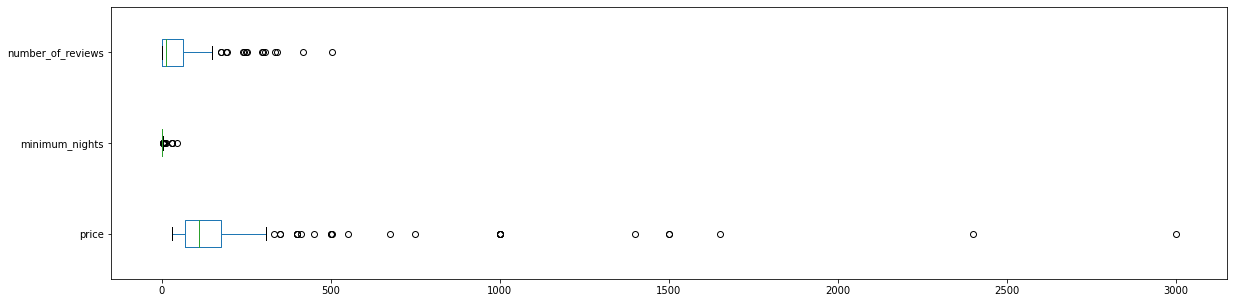

In [ ]:
df[['price', 'minimum_nights', 'number_of_reviews']].plot(kind='box', vert=False, figsize=(20, 5));

Como antes dito, ter encontrado outliers não significa que queiramos retirá-los, uma vez que isso depende de nossa aplicação e se eles a afetam ou não.

## <img width="8%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/shovel_2.png"> **Cavando mais fundo**

Se uma variável é linear com outra ($x_1 = a.x_2$), usar ambas num modelo de aprendizado de máquina, por exemplo, pode produzir um preditor enviesado. Por conta disso, é sempre importante observarmos a correlação no dataset. Para isso, usamos `corr()`.



In [ ]:
corr = df[['price', 'minimum_nights', 'number_of_reviews',
           'reviews_per_month','calculated_host_listings_count',
           'availability_365']].corr()

corr

price  ...  availability_365
price                           1.000000  ...         -0.106180
minimum_nights                 -0.071712  ...         -0.044717
number_of_reviews              -0.212285  ...         -0.066617
reviews_per_month              -0.240613  ...         -0.129872
calculated_host_listings_count -0.140285  ...          0.281359
availability_365               -0.106180  ...          1.000000

[6 rows x 6 columns]

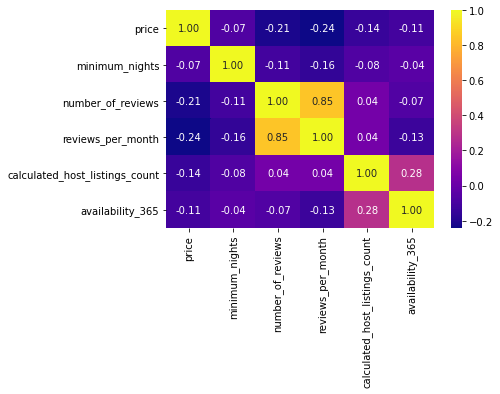

In [ ]:
sns.heatmap(corr, fmt='.2f', linecolor='white', annot=True, cmap='plasma');

<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***A correlação significativa encontrada foi a de 85% entre `reviews_per_month` e `number_of_reviews`. Ambas são necessariamente correlatas, logo não há problema nesse fato.***

## <img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/crystal.png"> **Parece que encontramos um pouco de `Storytelling`**

Aparentemente, escavamos muitos `insights valiosos`, mas nenhuma ideia é grande o suficiente até que a contemos, por isso, precisamos do `storytelling`.


* **Como você gostaria de mostrar o que descobriu sobre os dados?**
* **Que ideia você gostaria de vender?**


Dito isto, mostraremos duas coisas:


*   ***Que tipo de propriedade é mais comum no Airbnb de Salem? Como oferecer minha propriedade sabendo os números?***
*   ***Como o preço dos imóveis está geograficamente distribuído pela cidade?***



### ***Tipo de propriedade***

Primeiramente, vejamos quantas temos de cada tipo.

In [ ]:
rooms = df.room_type.value_counts()

rooms

Entire home/apt    93
Private room       71
Shared room         2
Name: room_type, dtype: int64

Apenas dois imóveis em modelo de quarto compartilhado!!! Caso alguém esteja procurando um desses, é melhor dizer o quão difícil será encontrar outro.

### ***Preço geograficamente distribuído***

Com as coordenadas das propriedades e seus preços, podemos facilmente plotar uma bela visão da cidade.

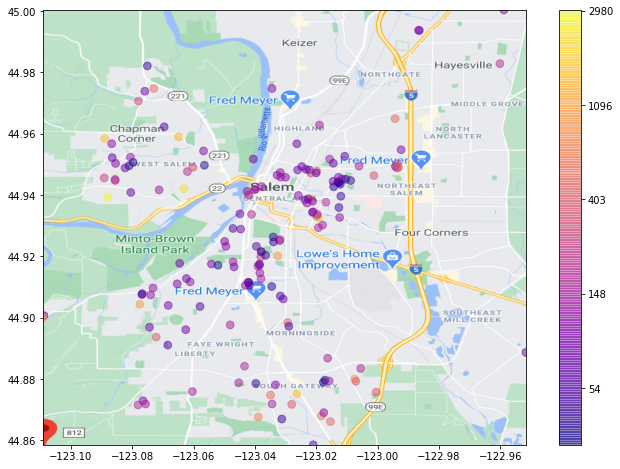

In [ ]:
img = plt.imread("https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/salem.png")
fig, ax = plt.subplots(figsize=(12, 8))

limits = [df['longitude'].min(), df['longitude'].max(), df['latitude'].min(), df['latitude'].max()]

ax.imshow(img, extent=limits)
sc = ax.scatter(df['longitude'], df['latitude'], c=np.log(df['price']), alpha=0.5, cmap='plasma', s=60)
cbar = plt.colorbar(sc)
cbar.ax.set_yticklabels(np.exp([4, 5, 6, 7, 8]).astype('int32'))

plt.show()

## <img width="13%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/bottomless_pit.png"> **É um poço sem fundo**

Lembre-se, o quanto você vê, depende do quão perto você olha, e de que ângulo. Isso significa que sempre haverão mais informações a serem extraídas do dataset (caso seja necessário e conveniente é claro)
 
 
* **O que você está tentando encontrar ou afirmar com os dados?**
* **Os "cristais" encontrados, como você irá lapidá-los? Como você irá exibi-los?**